In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [2]:

data = pd.read_csv("credit_card_customer_data.csv")
scale = StandardScaler()
data = scale.fit_transform(data)

In [3]:

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


def single_linkage(cluster1, cluster2):
    return min(euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2)


def complete_linkage(cluster1, cluster2):
    return max(euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2)


def average_linkage(cluster1, cluster2):
    return np.mean([euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2])


def centroid_linkage(cluster1, cluster2):
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    return euclidean_distance(centroid1, centroid2)


# def hierarchical_clustering(data, linkage_func):
#     clusters = [[i] for i in range(len(data))]

#     while len(clusters) > 1:
#         min_distance = float('inf')
#         merge_indices = None

#         for i in range(len(clusters)):
#             for j in range(i + 1, len(clusters)):
#                 # Pass individual points to linkage_func
#                 distance = linkage_func([data[i]], [data[j]])
#                 if distance < min_distance:
#                     min_distance = distance
#                     merge_indices = (i, j)

#         i, j = merge_indices
#         clusters[i].extend(clusters[j])
#         del clusters[j]

#     return clusters


def hierarchical_clustering_linkage(data, linkage_func):
    clusters = [[i] for i in range(len(data))]
    linkage_matrix = []

    while len(clusters) > 1:
        min_distance = float('inf')
        merge_indices = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = linkage_func(data[clusters[i]], data[clusters[j]])

                if distance < min_distance:
                    min_distance = distance
                    merge_indices = (i, j)
                    
        if merge_indices is not None:
            i, j = merge_indices
            linkage_matrix.append(
                [i, j, min_distance, len(clusters[i]) + len(clusters[j])]
            )
            clusters[i].extend(clusters[j])
            del clusters[j]

    return np.array(linkage_matrix)

# Perform hierarchical clustering with different linkage functions
# single_clusters = hierarchical_clustering(data, single_linkage)
# complete_clusters = hierarchical_clustering(data, complete_linkage)
# average_clusters = hierarchical_clustering(data, average_linkage)
# centroid_clusters = hierarchical_clustering(data, centroid_linkage)

In [4]:

# Perform hierarchical clustering with different linkage functions
single_linkage_matrix = hierarchical_clustering_linkage(data, single_linkage)
print(single_linkage_matrix)

complete_linkage_matrix = hierarchical_clustering_linkage(data, complete_linkage)
print(complete_linkage_matrix)

average_linkage_matrix = hierarchical_clustering_linkage(data, average_linkage)
print(average_linkage_matrix)

centroid_linkage_matrix = hierarchical_clustering_linkage(data, centroid_linkage)
print(centroid_linkage_matrix)


[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.22000000e+02 4.39000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [1.00000000e+00 3.00000000e+00 2.35816184e+00 6.57000000e+02]
 [0.00000000e+00 1.00000000e+00 2.72006832e+00 6.58000000e+02]
 [0.00000000e+00 1.00000000e+00 2.94403920e+00 6.60000000e+02]]
[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.22000000e+02 4.39000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 5.70281070e+00 2.28000000e+02]
 [0.00000000e+00 1.00000000e+00 7.07655372e+00 6.12000000e+02]
 [0.00000000e+00 1.00000000e+00 9.06752047e+00 6.60000000e+02]]
[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.22000000e+02 4.39000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [0.00000000e+00 2.00000000e+00 4.1112

In [5]:

def draw_dendrogram(linkage_matrix, linkage_name):
    plt.figure(figsize=(8, 6))
    dendrogram(linkage_matrix, orientation='top')
    plt.title(f"{linkage_name} Linkage Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


draw_dendrogram(single_linkage_matrix, 'Single')
draw_dendrogram(complete_linkage_matrix, 'Complete')
draw_dendrogram(average_linkage_matrix, 'Average')
draw_dendrogram(centroid_linkage_matrix, 'Centroid')


[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.23000000e+02 4.40000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [1.31200000e+03 1.31500000e+03 2.35816184e+00 6.57000000e+02]
 [0.00000000e+00 1.31600000e+03 2.72006832e+00 6.58000000e+02]
 [9.04000000e+02 1.31700000e+03 2.94403920e+00 6.60000000e+02]]
[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.23000000e+02 4.40000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [1.31300000e+03 1.31500000e+03 5.70281070e+00 2.28000000e+02]
 [1.31200000e+03 1.31600000e+03 7.07655372e+00 6.12000000e+02]
 [1.31400000e+03 1.31700000e+03 9.06752047e+00 6.60000000e+02]]
[[1.36000000e+02 1.40000000e+02 9.39012832e-02 2.00000000e+00]
 [4.23000000e+02 4.40000000e+02 1.98613203e-01 2.00000000e+00]
 [9.00000000e+01 9.90000000e+01 2.20834860e-01 2.00000000e+00]
 ...
 [0.00000000e+00 1.31500000e+03 4.1112

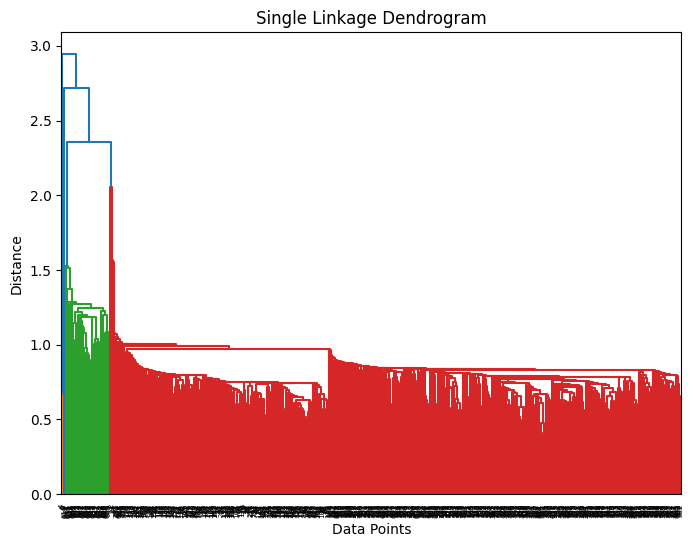

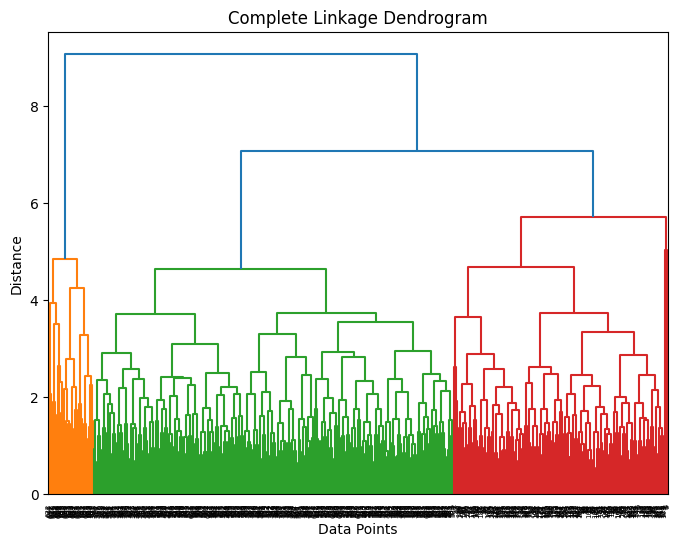

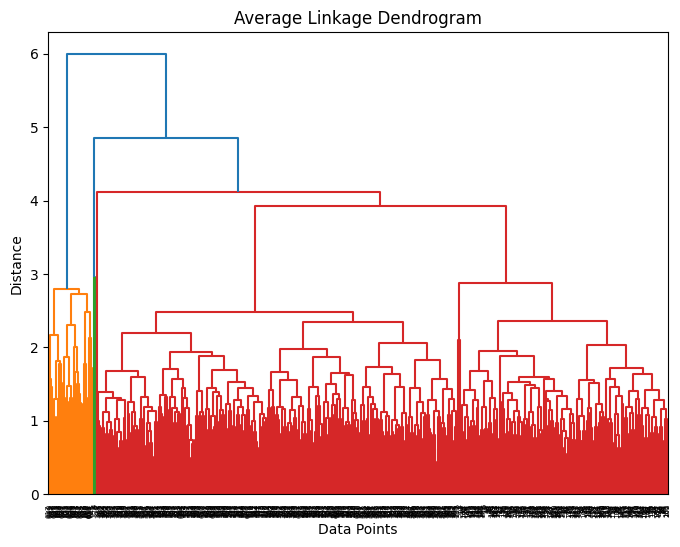

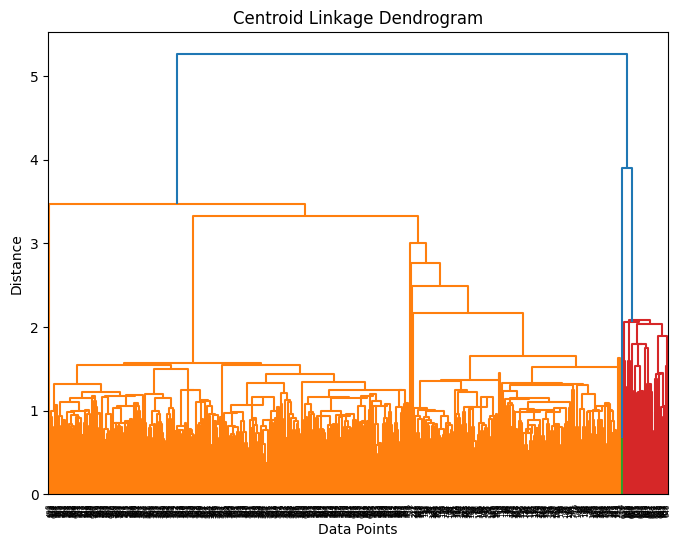

In [6]:

print(single_linkage_matrix)
print(complete_linkage_matrix)
print(average_linkage_matrix)
print(centroid_linkage_matrix)

# Draw dendrograms
draw_dendrogram(single_linkage_matrix, 'Single')
draw_dendrogram(complete_linkage_matrix, 'Complete')
draw_dendrogram(average_linkage_matrix, 'Average')
draw_dendrogram(centroid_linkage_matrix, 'Centroid')
